In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
0,0.1,0.5,2.1,19,5,379,3.54,15.10
1,1.0,4.0,1.1,16,13,269,5.79,21.30
2,1.9,19.0,1.0,14,12,245,8.51,22.75
3,3.1,21.7,2.1,17,6,273,11.52,15.72
4,4.1,24.6,2.9,11,10,237,10.16,7.71
5,4.9,39.2,1.1,12,7,278,11.14,22.67
6,5.9,23.6,2.1,13,13,241,15.04,18.11
7,7.0,63.0,2.0,13,20,269,15.10,24.30
8,8.1,72.9,2.9,14,1,248,14.49,24.04
9,8.9,35.6,2.8,16,1,210,16.90,25.11


#### Kalkomey's probability of spuriousness

In the context of a single (seismic) attribute as a possible predictor of a reservoir porperty, **Kalkomey (1997, Reference 3)** defined spuriousness as the probability of observing the absolute value of the sample correlation, r, being greater than some constant, R, given the true (population) correlation ρ is zero is given by:

\begin{equation*}
p_{sc} = Pr (|r|>= R)= Pr \Bigl( |t| >= \frac{R \sqrt{n-2}}{\sqrt{1-R^2}} \Bigr)
\end{equation*}


where n is the sample size or number of locations (the wells) with measurements of both the reservoir property and the seismic attribute, and t is the Student’s t distribution with n-2 degrees of freedom.

This probability of spuriousness psc is the same as the well-known p-value, and we can rephrase the above as per my definition of p-value: p it is the probability of getting a sample with at least the correlation coefficient we just got or even higher, purely by chance.

With multiple attributes ..... bla bla .....

\begin{equation*}
1-(1-p_{sc})^{k} =  \sum_{i=1}^k  p_{sc}(1-p_{sc})^{(i-1)}
\end{equation*}


The function below calculates psc:

In [3]:
def P_spurious (r, nwells, nattributes):
    t_of_r = r * np.sqrt((nwells-2)/(1-np.power(r,2)))  
    p = sp.stats.t.sf(np.abs(t_of_r), nwells-2)*2 
    ks = np.arange(1, nattributes+1, 1)
    return np.sum(p * np.power(1-p, ks-1))

Notice that the probability of spuriousness depends solely on the number of attributes, the number of wells n and the magnitude R of the spurious sample correlation.

We want to use the function to replicat Tables 2-5 in the paper.

In [4]:
r = 0.5
nrs = np.arange(0.1, 1, 0.1).round(decimals=2)
wells= np.asarray([5, 10, 15, 20, 25, 35, 50, 75, 100])

##### 10 attributes - replicating Table 3

In [5]:
ps = np.asarray([P_spurious(R, nw, 10)  for R in nrs for nw in wells]).reshape(9,9)

In [6]:
psdf = pd.DataFrame(ps, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

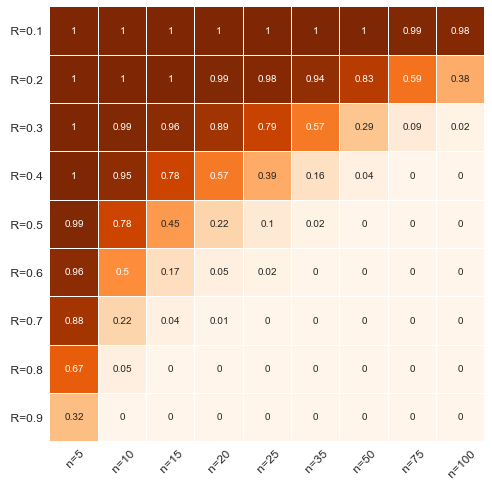

In [7]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(psdf, annot=True,annot_kws={"size": 10}, cmap='Oranges', square=True, linewidths=0.01, cbar=False)
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
plt.show()

##### 10 attributes - replicating Table 1

When there is only one attribute the probability of spuriousness depends only on the number of wells n and the magnitude R of the spurious sample correlation.

In [8]:
ps = np.asarray([P_spurious(R, nw, 1)  for R in nrs for nw in wells]).reshape(9,9)

In [9]:
psdf = pd.DataFrame(ps, index = [" R=" + mp for mp in map(str, nrs)], 
                  columns = [" n=" + mp for mp in map(str, wells)]).round(decimals=2)

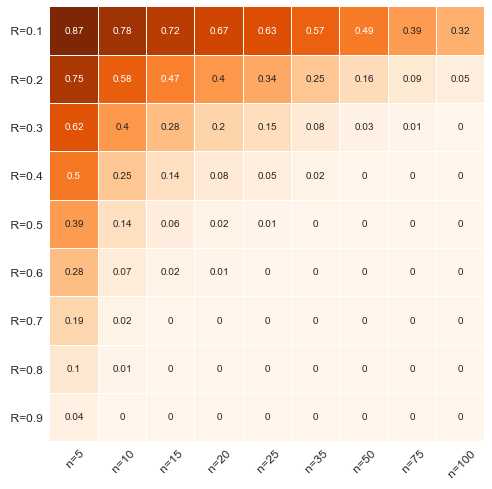

In [10]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(psdf, annot=True,annot_kws={"size": 10}, cmap='Oranges', square=True, linewidths=0.01, cbar=False)
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
plt.show()

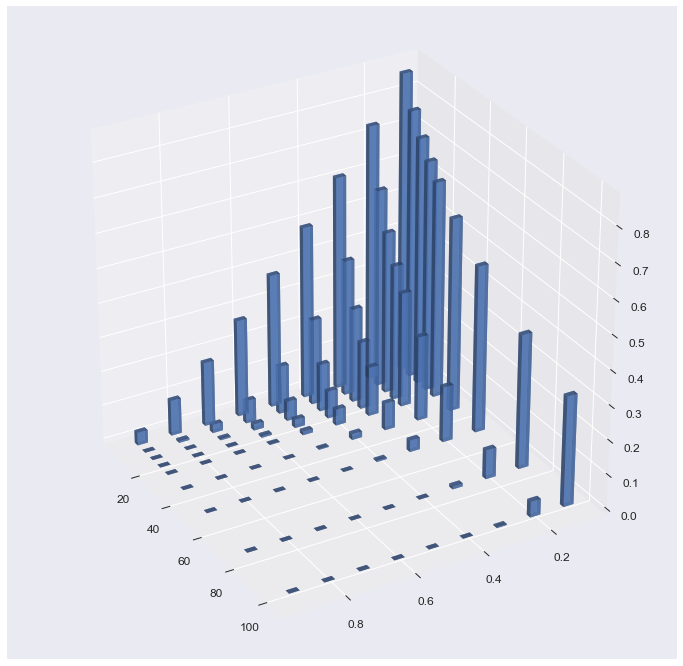

In [11]:
from mpl_toolkits.mplot3d import Axes3D
nrs = np.arange(0.1, 1, 0.1)
wells= np.asarray([5, 10, 15, 20, 25, 35, 50, 75, 100])

xpos, ypos = np.meshgrid(wells, nrs)
xpos = xpos.flatten()  
ypos = ypos.flatten()
z = ps.flatten()
bottom = np.zeros_like(z)
width = 2
depth = 0.03
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, bottom, width, depth, z, alpha = 0.7)
ax.invert_yaxis()
ax.view_init(30, -30)
plt.show()